In [1]:
# install library. Uncomment if it's not installed
!pip install sentence-transformers

     |████████████████████████████████| 79 kB 5.1 MB/s 
     |████████████████████████████████| 3.5 MB 17.3 MB/s 
     |████████████████████████████████| 1.2 MB 43.6 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 596 kB 52.1 MB/s 
     |████████████████████████████████| 895 kB 57.8 MB/s 
     |████████████████████████████████| 6.8 MB 35.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=ef0121f096f16ffe039ecd9f4e74aa53845f08ecaa6b2b1e4e495390673a86c7
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
# import libraries
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# upload XML-R pretrained model
embedder = SentenceTransformer('sentence-transformers/paraphrase-xlm-r-multilingual-v1')

Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
# read data
df = pd.read_csv('sample data.csv', sep=';')
# data shape
df.shape

(46, 4)

In [5]:
df.head()

,text,hashtags,place_country_code,Developed / Developing
0,#France passes 'pioneering' #foodwaste bill to...,#France #foodwaste #supermarkets #zerowaste,FR,Developed
1,#ZeroWaste is #MoreThanPossible - Japanese Tow...,#ZeroWaste #MoreThanPossible #StoriesToInspire,US,Developed
2,Back in the UK after a week spent in France. T...,#zerowaste #Resolution2016,GB,Developed
3,Been wanting to go #zerowaste or #declutter an...,#zerowaste #declutter #donate #MondayMotivation,US,Developed
4,Celebrate the new year with these #zerowaste #...,#zerowaste #NYE,US,Developed


In [6]:
# vectorize text data
corpus_embeddings = embedder.encode(df['text'])

Task 2.1

In [ ]:
states = df['place_country_code'].unique()
# set number of clusters
num_clusters = 2
# set clustering model
clustering_model = KMeans(n_clusters=num_clusters)
# train model
clustering_model.fit(corpus_embeddings)

KMeans(n_clusters=2)

In [ ]:
# function for clean data from duplicates and make a string
def clean(x):
    x = ' '.join(x)
    x = list(set(x.split()))
    x = '\n'+'\n '.join(x[:4])
    return x

In [ ]:
# evaluate model predict clusters
clusters = clustering_model.labels_

df['clusters'] = clusters
df['count_cluster'] = 1
cluster1 = df[df['clusters']==0]['place_country_code'].unique()
cluster2 = df[df['clusters']==1]['place_country_code'].unique()
cluster1 = set(cluster1) - set(cluster2)
cluster2 = set(cluster2) - set(cluster1)
df = df[((df['clusters']==0)&(df['place_country_code'].isin(cluster1)))|
        ((df['clusters']==1)&(df['place_country_code'].isin(cluster2)))]

# counting size of Developed/Developing for each cluster and make list of countries for it
df_dev = df.groupby(['clusters', 'Developed / Developing'], 
                    as_index=False).agg({'count_cluster':['count'],
                                         'place_country_code':['unique']})
# set columns names
df_dev.columns = ['clusters', 'Dev-ped/Dev-ing', 'size', 'country']
# compose a line for output on the diagram
df_dev['Dev-ped/Dev-ing'] = df_dev['Dev-ped/Dev-ing'] + '\nCountries:'+ df_dev['country'].apply(clean)
# calculate size of clusers
df_sum = df_dev.groupby(['clusters'], as_index=False)['size'].sum()
df_fin = pd.merge(df_dev, df_sum, on = 'clusters')
# count the share of each part of the cluster
df_fin['pct']=df_fin['size_x']/df_fin['size_y']*100
df_fin['pct'] = df_fin['pct'].round(2)

0
1


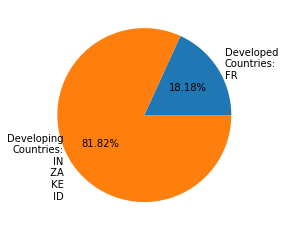

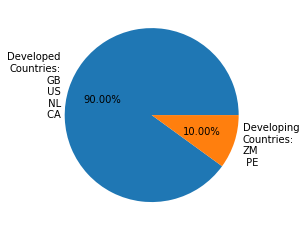

In [ ]:
# display of charts
for cl in set(clusters):
    print(cl)
    labels = df_fin[df_fin['clusters']== cl]['Dev-ped/Dev-ing'].tolist()
    sizes = df_fin[df_fin['clusters']== cl]['pct'].tolist()
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.2f%%')
    # break

plt.show()

Task 2.2

In [ ]:
df = pd.read_csv('sample data.csv', sep=';')
# vectorize text data
corpus_embeddings = embedder.encode(df['text'])

states = df['place_country_code'].unique()
# set number of clusters
num_clusters = 5
# set clustering model
clustering_model = KMeans(n_clusters=num_clusters)
# train model
clustering_model.fit(corpus_embeddings)

# evaluate model predict clusters
clusters = clustering_model.labels_

df['clusters'] = clusters
df['count_cluster'] = 1

cl_countries = []
for cl in set(clusters):
  cluster = df[df['clusters']== cl]['place_country_code'].unique()
  cl_countries.append(cluster)

len_countr = len(cl_countries)
for ic in range(len_countr):
  # print(f'-{ic}-')
  country_i = cl_countries[ic]
  for jc in range(len_countr):
    
    if ic != jc:
      # print(f'{jc}-')
      country_j = cl_countries[jc]
      cl_countries[jc] = set(country_j) - set(country_i)

df_tmp = pd.DataFrame()
for cl, ic in enumerate(cl_countries):
  dfic = df[((df['clusters']== cl)&(df['place_country_code'].isin(ic)))]
  df_tmp = pd.concat([df_tmp, dfic], ignore_index=True)

df = df_tmp
# counting size of Developed/Developing for each cluster and make list of countries for it
df_dev = df.groupby(['clusters', 'Developed / Developing'], 
                    as_index=False).agg({'count_cluster':['count'],
                                         'place_country_code':['unique']})
# set columns names
df_dev.columns = ['clusters', 'Dev-ped/Dev-ing', 'size', 'country']
# compose a line for output on the diagram
df_dev['Dev-ped/Dev-ing'] = df_dev['Dev-ped/Dev-ing'] + '\nCountries:'+ df_dev['country'].apply(clean)
# calculate size of clusers
df_sum = df_dev.groupby(['clusters'], as_index=False)['size'].sum()
df_fin = pd.merge(df_dev, df_sum, on = 'clusters')
# count the share of each part of the cluster
df_fin['pct']=df_fin['size_x']/df_fin['size_y']*100
df_fin['pct'] = df_fin['pct'].round(2)

In [ ]:
df_fin

,clusters,Dev-ped/Dev-ing,size_x,country,size_y,pct
0,0,Developed\nCountries:\nGB\n US\n FR\n CA,19,"[FR, US, CA, GB, DE]",22,86.36
1,0,Developing\nCountries:\nZA\n PE\n KE,3,"[PE, ZA, KE]",22,13.64
2,1,Developing\nCountries:\nID,5,[ID],5,100.00
3,2,Developed\nCountries:\nES\n NL,4,"[NL, ES]",5,80.00
4,2,Developing\nCountries:\nZM,1,[ZM],5,20.00
5,4,Developing\nCountries:\nIN,2,[IN],2,100.00


0
1
2
3
4


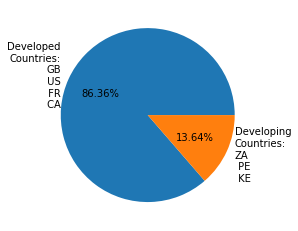

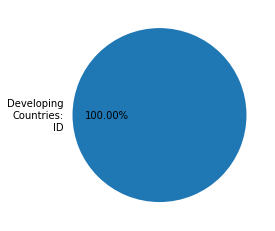

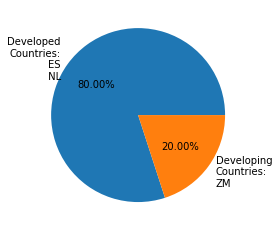

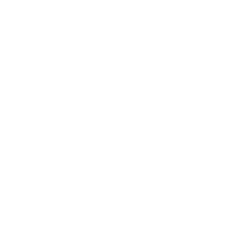

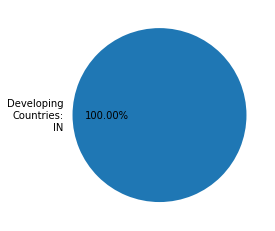

In [ ]:
# display of charts
for cl in set(clusters):
    labels = df_fin[df_fin['clusters']== cl]['Dev-ped/Dev-ing'].tolist()
    sizes = df_fin[df_fin['clusters']== cl]['pct'].tolist()
    fig, ax = plt.subplots()
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.2f%%')
    # break

plt.show()

Task 2.3

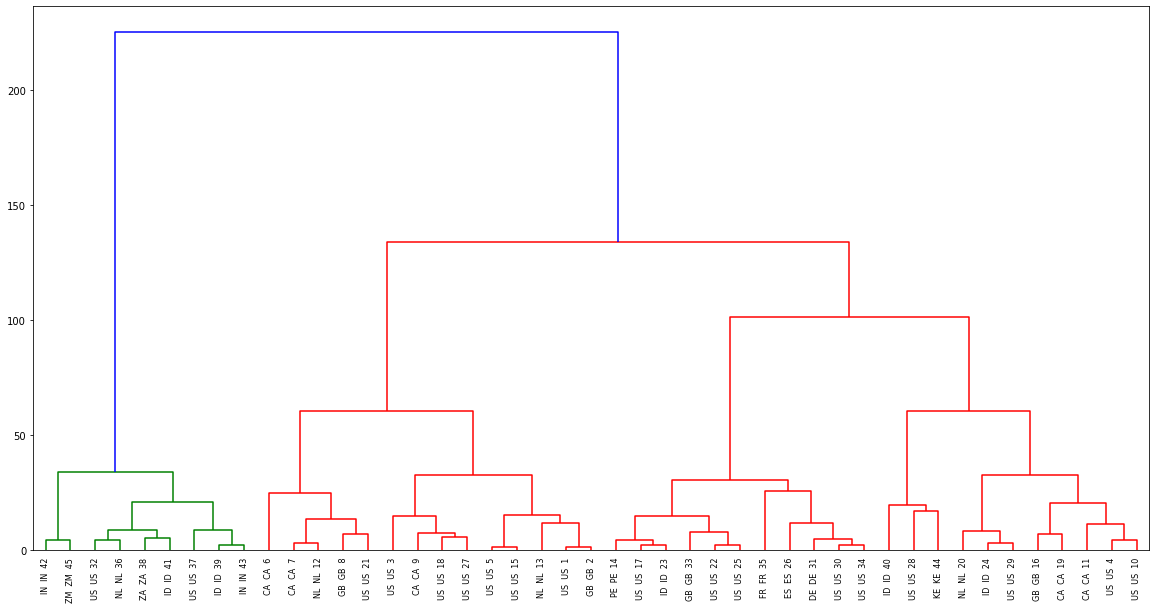

In [129]:
# hierarchical clustering
# set clustering model
model = AgglomerativeClustering(distance_threshold= 1, n_clusters=None)
# train model
model = model.fit(corpus_embeddings)
df.index = df['place_country_code']+ '  ' +df.index.astype(str)
# evaluate model predict clusters
Z = hierarchy.linkage(model.children_, 'ward')
# display of chart
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z, labels=df.index)

In [130]:
df['clusters'] = model.labels_
df_cl = df.groupby('clusters', as_index=False).agg({'hashtags':['unique'],
                                            'place_country_code':['unique']})
df_cl.columns = ['clusters', 'hashtags', 'country_code']
# df_cl

In [131]:
cls = len(df_cl['clusters'].unique())
amount = cls/4 + 1
amount = int(amount)

In [132]:
a1 = [i for i in range(1, 33, 3)]*4

In [133]:
a2 = []
for i in range(2, 20, 5):
  a2 = a2 + [i]*(amount - 1)

In [134]:
dat = np.array([a1, a2])

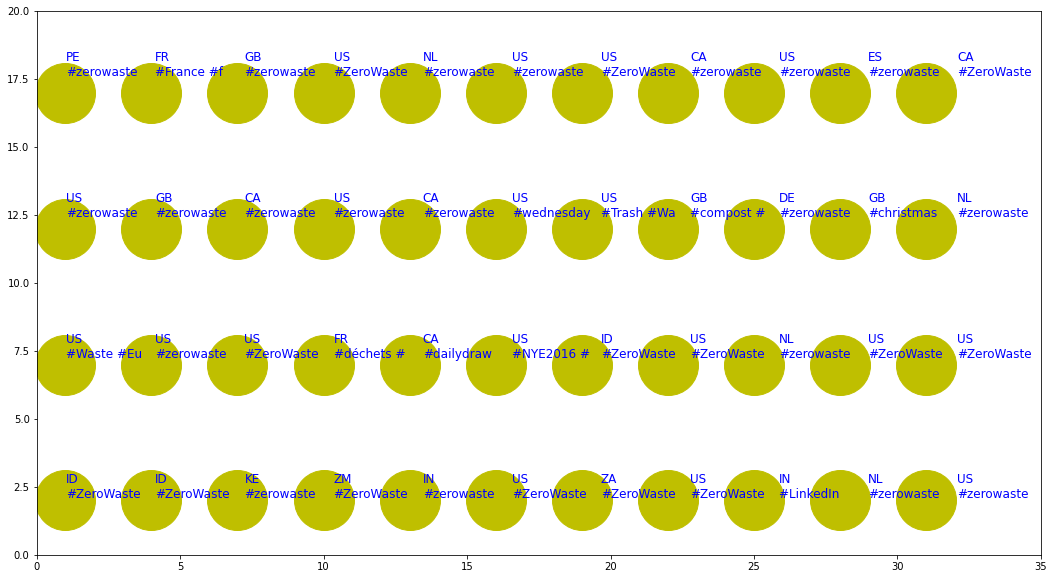

In [135]:
# This is the point you want to point out
point = dat[:, 2]

# Make the figure
plt.figure(1, figsize=(18, 10))
plt.clf()
ax = plt.gca()
# Plot the data
ax.plot(dat[0], dat[1], 'o', ms=60, color='y')
ax.set_xlim([0, 35])
ax.set_ylim([0, 20])

for i in range(cls):

  hashtags = df_cl[df_cl['clusters']==i]['hashtags'].tolist()
  hasht = ''
  if len(hashtags)>0:
    for hsi in hashtags:
      hasht = hasht + ', '.join(hsi)

  country = df_cl[df_cl['clusters']==i]['country_code'].tolist()
  countrs = ''
  if len(country)>0:
    for cti in country:
      countrs = countrs + ', '.join(cti)
      
  point = (dat[0][i], dat[1][i])
  
  ax.annotate(countrs +'\n' + hasht[:10], 
              xy=point, 
              xytext= point,
              textcoords='offset points',
              color='b', size='large')